# En este Notebook aplicaremos las tecnicas de normalización min-max, estandarización y normalización con la media

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
# Clases para estandarización 
from sklearn.preprocessing import StandardScaler
# El escalador - para escalamiento min-max 
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargando los datos
data = pd.read_csv('/home/ia/cursoECI/cursoIV/Datasets/raw/boston.csv')
data.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [26]:
# Observemos los pamámetros estadísticos principales de cada
# variable para darnos una idea del rango de valores

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Diferentes variables tienen diferentes rangos de valores representados por la media (mean), max, min y desviación estandar, etc. En otras palabras, tienen diferentes magnitudes o escalas. 

In [4]:
# separemos los datos en los sets de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

### Normalización Mix-Max

In [5]:
# Instanciamos el escalador
scaler = MinMaxScaler()

# Entrenamos el escalador en el set de entrenamiento
scaler.fit(X_train)

# Transforma los sets de entrenamiento y prueba 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# El escalador guarda los valores máximos de las variables
# aprendidas del set de entrenamiento
scaler.data_max_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

In [7]:
# El escalador también guarda el rango de los 
# valores (max -  min)

scaler.data_range_

array([8.896988e+01, 1.000000e+02, 2.728000e+01, 1.000000e+00,
       4.860000e-01, 5.219000e+00, 9.710000e+01, 1.095230e+01,
       2.300000e+01, 5.240000e+02, 9.400000e+00, 3.965800e+02,
       3.525000e+01])

In [8]:
# Transformemos los arreglos NumPy resultantes 
# en dataframes para el resto del ejercicio

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [9]:
# Observamos el set de entrenamiento original:
np.round(X_train.describe().transpose(), 1)

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.4,8.4,0.0,0.1,0.3,3.1,89.0
ZN,354.0,11.8,23.7,0.0,0.0,0.0,20.0,100.0
INDUS,354.0,11.1,7.0,0.5,5.0,8.6,18.1,27.7
CHAS,354.0,0.1,0.2,0.0,0.0,0.0,0.0,1.0
NOX,354.0,0.6,0.1,0.4,0.4,0.5,0.6,0.9
RM,354.0,6.3,0.7,3.6,5.9,6.2,6.6,8.8
AGE,354.0,69.0,28.0,2.9,45.2,79.4,93.8,100.0
DIS,354.0,3.8,2.1,1.2,2.1,3.2,5.1,12.1
RAD,354.0,9.4,8.7,1.0,4.0,5.0,24.0,24.0
TAX,354.0,401.8,170.6,187.0,276.0,311.0,666.0,711.0


In [10]:
# Observamos el set de entrenamiento normalizado: en particular los valores mínimos y máximos
np.round(X_train_scaled.describe().transpose(), 1)

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,0.0,0.1,0.0,0.0,0.0,0.0,1.0
ZN,354.0,0.1,0.2,0.0,0.0,0.0,0.2,1.0
INDUS,354.0,0.4,0.3,0.0,0.2,0.3,0.6,1.0
CHAS,354.0,0.1,0.2,0.0,0.0,0.0,0.0,1.0
NOX,354.0,0.4,0.2,0.0,0.1,0.3,0.5,1.0
RM,354.0,0.5,0.1,0.0,0.4,0.5,0.6,1.0
AGE,354.0,0.7,0.3,0.0,0.4,0.8,0.9,1.0
DIS,354.0,0.2,0.2,0.0,0.1,0.2,0.4,1.0
RAD,354.0,0.4,0.4,0.0,0.1,0.2,1.0,1.0
TAX,354.0,0.4,0.3,0.0,0.2,0.2,0.9,1.0


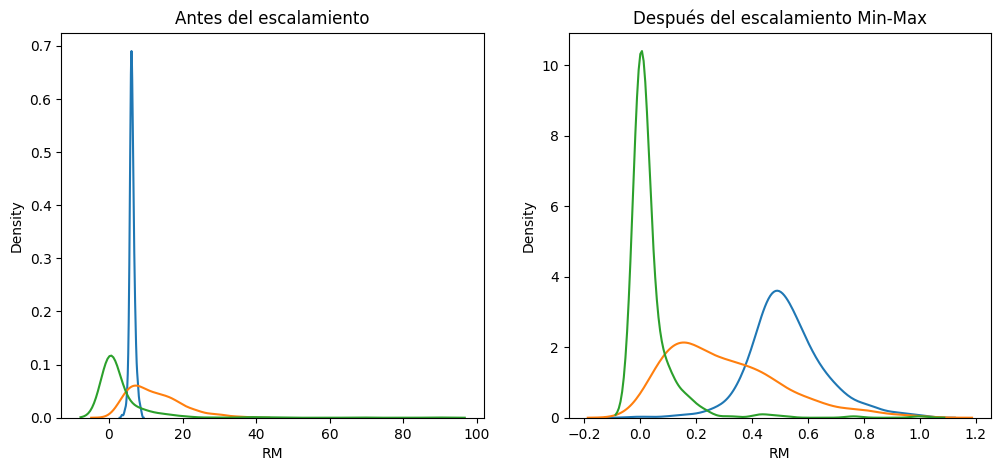

In [11]:
# Comparemos la distribución de las variables antes y después del escalamiento

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Antes del escalamiento')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

ax2.set_title('Después del escalamiento Min-Max')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

Podemos ver que los valores están ahora limitados a un valor máximo de 1 pero las distribuciones no están centradas alrededor de zero.

### Estandarización

In [12]:
# Estandarización: con el StandardScaler de sklearn

# Inicializa el escalador
scaler = StandardScaler()

# Entrena el escalador en el set de entrenamiento
# Aprende los parámetros 
scaler.fit(X_train)

# Transforma los sets de entrenamiento y prueba 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# El escalador guarda la media de las variables
# aprendidas del set de entrenamiento

print(scaler.mean_)

# El escalador guarda la desviación estándar
# de las variables aprendidas del set de entrenamiento
print(scaler.scale_)

[3.35828432e+00 1.18093220e+01 1.10787571e+01 6.49717514e-02
 5.56098305e-01 6.30842655e+00 6.89940678e+01 3.76245876e+00
 9.35310734e+00 4.01782486e+02 1.84734463e+01 3.60601186e+02
 1.24406497e+01]
[8.34141658e+00 2.36196246e+01 6.98393565e+00 2.46476009e-01
 1.15437239e-01 7.01016354e-01 2.79987983e+01 2.06473886e+00
 8.65974217e+00 1.70351284e+02 2.22166426e+00 8.55009244e+01
 7.06848020e+00]


In [14]:
# Transformemos los arreglos NumPy resultantes 
# en dataframes para el resto del demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [28]:
# Observamos el set de entrenamiento original: media y desviación estándar 
# Aqui usamos np.round para reducir el número de decimalaes a 1 
np.round(X_train.describe(), 1).transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.4,8.4,0.0,0.1,0.3,3.1,89.0
ZN,354.0,11.8,23.7,0.0,0.0,0.0,20.0,100.0
INDUS,354.0,11.1,7.0,0.5,5.0,8.6,18.1,27.7
CHAS,354.0,0.1,0.2,0.0,0.0,0.0,0.0,1.0
NOX,354.0,0.6,0.1,0.4,0.4,0.5,0.6,0.9
RM,354.0,6.3,0.7,3.6,5.9,6.2,6.6,8.8
AGE,354.0,69.0,28.0,2.9,45.2,79.4,93.8,100.0
DIS,354.0,3.8,2.1,1.2,2.1,3.2,5.1,12.1
RAD,354.0,9.4,8.7,1.0,4.0,5.0,24.0,24.0
TAX,354.0,401.8,170.6,187.0,276.0,311.0,666.0,711.0


In [27]:
# Observamos el set de entrenamiento normalizado: en particular la media y desviación estándar 
# Aqui usamos np.round para reducir el número  de decimalaes a 1 

np.round(X_train_scaled.describe(), 1).transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,-0.0,0.1,-0.0,-0.0,-0.0,-0.0,1.0
ZN,354.0,0.0,0.2,-0.1,-0.1,-0.1,0.1,0.9
INDUS,354.0,-0.0,0.3,-0.4,-0.2,-0.1,0.3,0.6
CHAS,354.0,0.0,0.2,-0.1,-0.1,-0.1,-0.1,0.9
NOX,354.0,-0.0,0.2,-0.4,-0.2,-0.0,0.2,0.6
RM,354.0,-0.0,0.1,-0.5,-0.1,-0.0,0.1,0.5
AGE,354.0,0.0,0.3,-0.7,-0.2,0.1,0.3,0.3
DIS,354.0,0.0,0.2,-0.2,-0.2,-0.0,0.1,0.8
RAD,354.0,0.0,0.4,-0.4,-0.2,-0.2,0.6,0.6
TAX,354.0,-0.0,0.3,-0.4,-0.2,-0.2,0.5,0.6


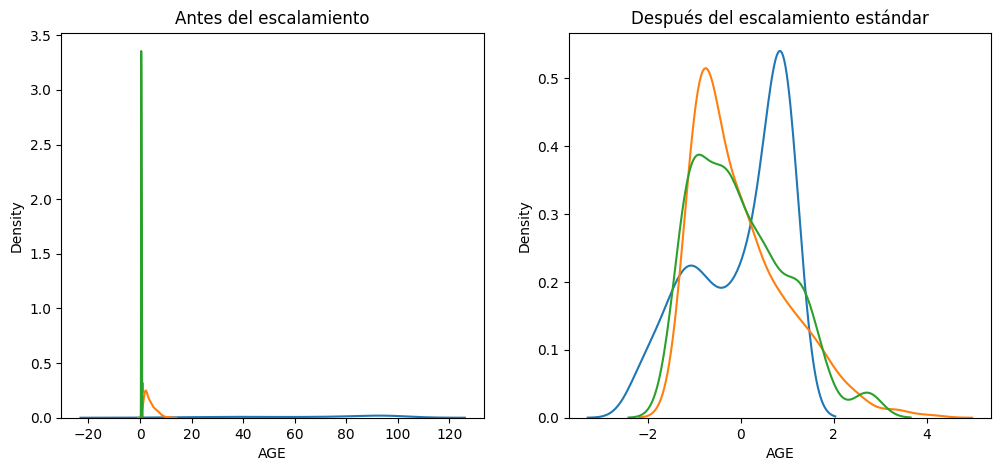

In [17]:
# Comparemos la distribución de las variables antes y despues del escalamiento.

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Antes de la normalización
ax1.set_title('Antes del escalamiento')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)


# Después de la normalización
ax2.set_title('Después del escalamiento estándar')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()



Se preserva la distribución original

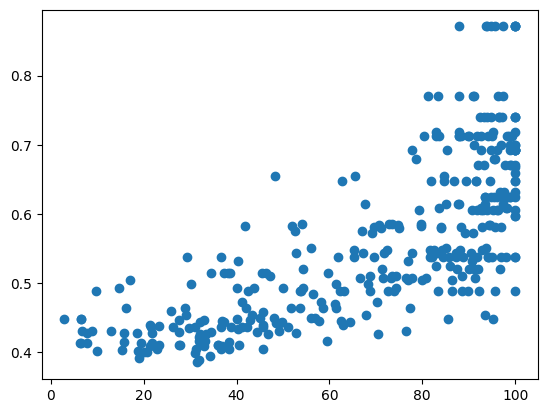

In [18]:
plt.scatter(X_train['AGE'], X_train['NOX'])

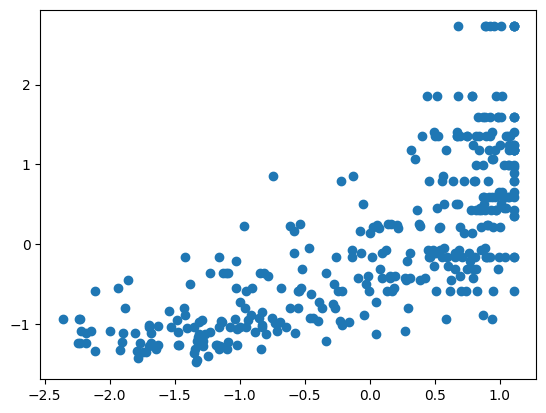

In [19]:
plt.scatter(X_train_scaled['AGE'], X_train_scaled['NOX'])

### Normalización con la media con pandas

In [20]:
# Primero, estimamos la media del set de entrenamiento

means = X_train.mean(axis=0)
means

CRIM         3.358284
ZN          11.809322
INDUS       11.078757
CHAS         0.064972
NOX          0.556098
RM           6.308427
AGE         68.994068
DIS          3.762459
RAD          9.353107
TAX        401.782486
PTRATIO     18.473446
B          360.601186
LSTAT       12.440650
dtype: float64

In [21]:
# Ahora estimamos los valores  min y max, y su rango 
# usando el set the entrenamiento

ranges = X_train.max(axis=0)-X_train.min(axis=0)
ranges

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.95230
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       35.25000
dtype: float64

In [22]:
# Tenemos todos los parámetros para la normalización:

X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

In [23]:
# Observamos el set de entrenamiento original: en particular la media y valores min/max  

np.round(X_train.describe().transpose(), 1)

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.4,8.4,0.0,0.1,0.3,3.1,89.0
ZN,354.0,11.8,23.7,0.0,0.0,0.0,20.0,100.0
INDUS,354.0,11.1,7.0,0.5,5.0,8.6,18.1,27.7
CHAS,354.0,0.1,0.2,0.0,0.0,0.0,0.0,1.0
NOX,354.0,0.6,0.1,0.4,0.4,0.5,0.6,0.9
RM,354.0,6.3,0.7,3.6,5.9,6.2,6.6,8.8
AGE,354.0,69.0,28.0,2.9,45.2,79.4,93.8,100.0
DIS,354.0,3.8,2.1,1.2,2.1,3.2,5.1,12.1
RAD,354.0,9.4,8.7,1.0,4.0,5.0,24.0,24.0
TAX,354.0,401.8,170.6,187.0,276.0,311.0,666.0,711.0


In [24]:
# Observamos el set de entrenamiento normalizado: media y valores min/max  

np.round(X_train_scaled.describe().transpose(), 1)

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,-0.0,0.1,-0.0,-0.0,-0.0,-0.0,1.0
ZN,354.0,0.0,0.2,-0.1,-0.1,-0.1,0.1,0.9
INDUS,354.0,-0.0,0.3,-0.4,-0.2,-0.1,0.3,0.6
CHAS,354.0,0.0,0.2,-0.1,-0.1,-0.1,-0.1,0.9
NOX,354.0,-0.0,0.2,-0.4,-0.2,-0.0,0.2,0.6
RM,354.0,-0.0,0.1,-0.5,-0.1,-0.0,0.1,0.5
AGE,354.0,0.0,0.3,-0.7,-0.2,0.1,0.3,0.3
DIS,354.0,0.0,0.2,-0.2,-0.2,-0.0,0.1,0.8
RAD,354.0,0.0,0.4,-0.4,-0.2,-0.2,0.6,0.6
TAX,354.0,-0.0,0.3,-0.4,-0.2,-0.2,0.5,0.6


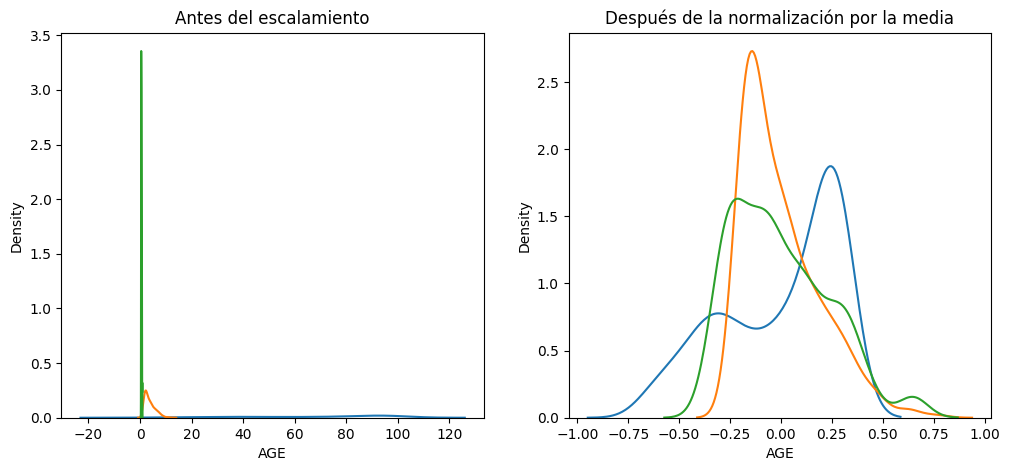

In [25]:
# Comparemos la distribución de las variables antes y despues del escalamiento
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Antes del escalamiento
ax1.set_title('Antes del escalamiento')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# Después del escalamiento
ax2.set_title('Después de la normalización por la media')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

Normalización por la media con Scikit-learn se deja como ejercicio

Normalización con la norma $𝐿_{1}$ del vector se deja como ejercicio
